In [15]:
import pandas as pd
from scipy import sparse
import matplotlib
print(pd.__version__)

1.2.4


In [16]:
user = pd.read_csv('user.csv')
location = pd.read_csv('locations.csv')
tourism = pd.merge(location,user).drop(['Category','timestamp'], axis=1)
tourism.head()

,Place_Id,Place_Name,User_Id,Place_Ratings
0,1,Monumen Nasional,36,4
1,1,Monumen Nasional,38,2
2,1,Monumen Nasional,64,2
3,1,Monumen Nasional,74,2
4,1,Monumen Nasional,86,4


In [17]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Place_Id       10000 non-null  int64 
 1   Place_Name     10000 non-null  object
 2   User_Id        10000 non-null  int64 
 3   Place_Ratings  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 390.6+ KB


<AxesSubplot:xlabel='Place_Ratings'>

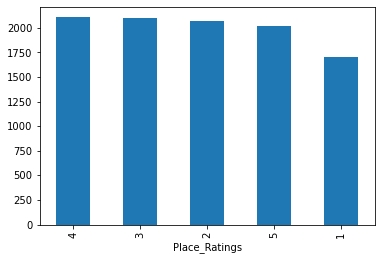

In [18]:
tourism_group = tourism.groupby('Place_Ratings')['Place_Name'].count().sort_values(ascending=False).head(100)
tourism_group.plot.bar()

<AxesSubplot:xlabel='Place_Id'>

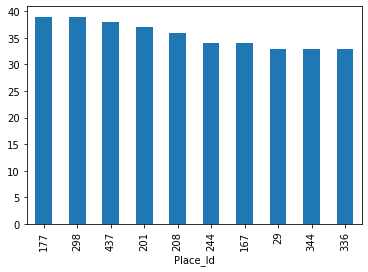

In [19]:
tourism_group = tourism.groupby('Place_Id')['Place_Name'].count().sort_values(ascending=False).head(10)
tourism_group.plot.bar()

<AxesSubplot:ylabel='Place_Name'>

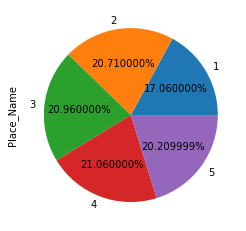

In [20]:
tourism.groupby('Place_Ratings')['Place_Name'].count().plot.pie(autopct="%1f%%")

<AxesSubplot:xlabel='User_Id'>

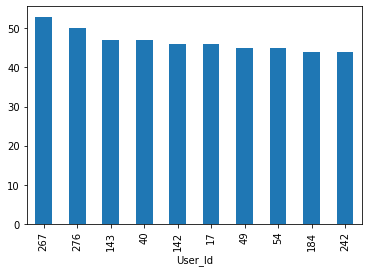

In [21]:
tourism_group = tourism.groupby('User_Id')['Place_Name'].count().sort_values(ascending=False).head(10)
tourism_group.plot.bar()

In [22]:
tourism_ratings = tourism.pivot_table(index=['User_Id'], columns=['Place_Name'],values='Place_Ratings')
tourism_ratings.head()


Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
##
print("Before: ",tourism_ratings.shape)
tourism_ratings = tourism_ratings.dropna(thresh=10,axis=1).fillna(0)
print("After: ",tourism_ratings.shape)

Before:  (300, 437)
After:  (300, 437)


In [24]:
corrMatrix = tourism_ratings.corr(method='pearson')
corrMatrix.head(5)
item_similarity_df = tourism_ratings.corr(method='pearson')
item_similarity_df.head(20)

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
Place_Name,,,,,,,,,,,,,,,,,,,,,
Air Mancur Menari,1.000000,-0.050176,0.051148,-0.049885,-0.027393,-0.049330,0.003020,-0.053072,-0.042530,0.111796,...,-0.051938,-0.042011,0.062815,0.068772,-0.020499,0.005199,0.079757,0.020889,-0.041978,-0.041491
Air Terjun Kali Pancur,-0.050176,1.000000,-0.022262,-0.031524,-0.029219,-0.039115,-0.020566,0.008532,0.038655,-0.055919,...,0.127719,0.053630,0.046863,-0.003455,0.178480,-0.060697,-0.060133,0.045886,-0.010317,0.153651
Air Terjun Kedung Pedut,0.051148,-0.022262,1.000000,-0.046497,-0.022099,-0.064954,0.197455,-0.007247,-0.056000,0.093265,...,-0.068388,-0.029059,-0.014981,-0.002772,0.121930,0.016378,0.128865,-0.006297,0.051909,-0.034874
Air Terjun Semirang,-0.049885,-0.031524,-0.046497,1.000000,-0.061689,-0.063617,0.043216,0.008077,-0.054847,0.175359,...,0.049991,-0.054178,0.030508,-0.022892,-0.044561,0.083554,-0.029896,-0.045085,0.020290,0.046452
Air Terjun Sri Gethuk,-0.027393,-0.029219,-0.022099,-0.061689,1.000000,-0.031209,0.115655,-0.023821,-0.042961,-0.040060,...,-0.046424,-0.051953,0.002155,-0.036515,-0.007687,-0.028191,0.108475,-0.020469,0.135003,-0.051310
Alive Museum Ancol,-0.049330,-0.039115,-0.064954,-0.063617,-0.031209,1.000000,0.088837,0.000952,0.103890,-0.061102,...,-0.011435,-0.049020,0.022371,-0.061880,-0.031361,-0.059674,-0.004611,-0.076814,-0.025639,-0.006633
Alun Alun Selatan Yogyakarta,0.003020,-0.020566,0.197455,0.043216,0.115655,0.088837,1.000000,0.121404,-0.005574,-0.013240,...,0.034878,-0.058219,-0.033732,-0.067243,0.045090,0.031053,0.126094,-0.012220,-0.032024,-0.057499
Alun-Alun Kota Bandung,-0.053072,0.008532,-0.007247,0.008077,-0.023821,0.000952,0.121404,1.000000,-0.046702,-0.045107,...,0.061522,-0.057640,-0.016698,-0.066574,-0.058696,0.039477,-0.071491,-0.082640,0.115943,0.140070
Alun-alun Utara Keraton Yogyakarta,-0.042530,0.038655,-0.056000,-0.054847,-0.042961,0.103890,-0.005574,-0.046702,1.000000,-0.005149,...,-0.057105,-0.020415,-0.059308,0.186639,-0.047037,-0.014699,0.054222,-0.005304,0.137971,-0.045619


In [25]:
def get_similar(Place_Name,Place_Ratings):
    similar_ratings = corrMatrix[Place_Name]*(Place_Ratings-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    return similar_ratings

In [26]:
mountain_lover = [("Bukit Panguk Kediwung",5),("Bukit Gantole Cililin",2),("Blue Lagoon Jogja",1),("Air Terjun Kedung Pedut",2)]
similar_location = pd.DataFrame()
for users,locations in mountain_lover:
    similar_location = similar_location.append(get_similar(users,locations),ignore_index = True)

similar_location.head(5)

,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
0,-0.126668,0.136185,-0.001560,0.055179,0.262465,-0.027759,-0.078792,-0.173790,-0.128456,-0.099450,...,0.229632,-0.137570,-0.116794,-0.021780,0.050250,-0.153227,-0.051749,-0.119278,0.027848,0.159497
1,-0.024110,0.012060,0.013544,0.032622,-0.061460,0.007571,0.018854,-0.025922,-0.030388,0.031332,...,0.025358,0.003327,0.003064,0.004481,0.014316,0.011475,0.014781,0.003954,-0.038256,0.015020
2,0.088694,-0.041480,-0.224359,0.038965,-0.013938,0.031937,-0.093958,0.106739,0.074554,-0.157005,...,0.076645,-0.016143,0.091910,0.021662,0.003773,0.066025,-0.126882,-0.082644,-0.038775,-0.039279
3,-0.025574,0.011131,-0.500000,0.023249,0.011050,0.032477,-0.098727,0.003623,0.028000,-0.046633,...,0.034194,0.014530,0.007490,0.001386,-0.060965,-0.008189,-0.064432,0.003149,-0.025954,0.017437


In [27]:
similar_location.sum().sort_values(ascending=False).head(20)

Bukit Panguk Kediwung                   2.516098
Museum Konferensi Asia Afrika           0.688872
Monumen Perjuangan Rakyat Jawa Barat    0.575722
Museum Basoeki Abdullah                 0.560928
Teras Cikapundung BBWS                  0.519667
Bendung Lepen                           0.492979
Curug Tilu Leuwi Opat                   0.467849
Museum Kebangkitan Nasional             0.460735
Pantai Sepanjang                        0.449753
Desa Wisata Sungai Code Jogja Kota      0.410152
Perkebunan Teh Malabar                  0.392989
Museum Gunung Merapi                    0.391680
Gunung Manglayang                       0.388935
Upside Down World Bandung               0.384699
Rumah Batik                             0.384266
Candi Prambanan                         0.381091
Monumen Sanapati                        0.377080
Taman Pelangi                           0.373572
Wisata Alam Kalibiru                    0.369728
Wisata Alam Wana Wisata Penggaron       0.365830
dtype: float64

In [28]:
beach_lover = [("Bandros City Tour",5),("Bangsal Pagelaran",4),("Bukit Gantole Cililin",2),("Atlantis Land Surabaya",4)]
similar_location = pd.DataFrame()
for users,locations in beach_lover:
    similar_location = similar_location.append(get_similar(users,locations),ignore_index = True)

similar_location.head(10)
similar_location.sum().sort_values(ascending=False).head(10)

Bandros City Tour                       2.328411
Atlantis Land Surabaya                  1.422965
Bangsal Pagelaran                       1.383459
Sea World                               0.693670
Bukit Bintang Yogyakarta                0.584380
Alun-Alun Kota Bandung                  0.572224
Pulau Pramuka                           0.516076
Pantai Marina                           0.515719
Lereng Anteng Panoramic Coffee Place    0.502539
Lava Bantal                             0.469066
dtype: float64